In [102]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# UPX AML


## 1. Importing and inital analysis 

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', -1)

import warnings
warnings.simplefilter('ignore')

In [149]:
train = pd.read_csv('/content/gdrive/My Drive/UPX Certificate - 2/aml_train.csv')
train.head()

employee_id         department  ... avg_training_score is_promoted
0  65438        Sales & Marketing  ...  49                 0         
1  65141        Operations         ...  60                 0         
2  7513         Sales & Marketing  ...  50                 0         
3  2542         Sales & Marketing  ...  50                 0         
4  48945        Technology         ...  73                 0         

[5 rows x 14 columns]

In [105]:
train.nunique()

employee_id             54808
department              9    
region                  34   
education               3    
gender                  2    
recruitment_channel     3    
no_of_trainings         10   
age                     41   
previous_year_rating    5    
length_of_service       35   
KPIs_met >80%           2    
awards_won?             2    
avg_training_score      61   
is_promoted             2    
dtype: int64

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [107]:
train.isnull().sum()

employee_id             0   
department              0   
region                  0   
education               2409
gender                  0   
recruitment_channel     0   
no_of_trainings         0   
age                     0   
previous_year_rating    4124
length_of_service       0   
KPIs_met >80%           0   
awards_won?             0   
avg_training_score      0   
is_promoted             0   
dtype: int64

In [108]:
100 * train.isnull().sum() / len(train)

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [109]:
train.describe()

employee_id  no_of_trainings  ...  avg_training_score   is_promoted
count  54808.000000  54808.000000     ...  54808.000000        54808.000000
mean   39195.830627  1.253011         ...  63.386750           0.085170    
std    22586.581449  0.609264         ...  13.371559           0.279137    
min    1.000000      1.000000         ...  39.000000           0.000000    
25%    19669.750000  1.000000         ...  51.000000           0.000000    
50%    39225.500000  1.000000         ...  60.000000           0.000000    
75%    58730.500000  1.000000         ...  76.000000           0.000000    
max    78298.000000  10.000000        ...  99.000000           1.000000    

[8 rows x 9 columns]

## 2. Dealing with Missing values

In [110]:
train = train.fillna(train.mean())
train.isnull().sum()

employee_id             0   
department              0   
region                  0   
education               2409
gender                  0   
recruitment_channel     0   
no_of_trainings         0   
age                     0   
previous_year_rating    0   
length_of_service       0   
KPIs_met >80%           0   
awards_won?             0   
avg_training_score      0   
is_promoted             0   
dtype: int64

In [111]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()

original_1 = train
mask_1 = train.isnull()


train = train.astype(str).apply(LabelEncoder().fit_transform)
train.where(~mask_1, original_1)
train.isnull().sum()

employee_id  department  ...  avg_training_score is_promoted
0      43140        7           ...  10                  0         
1      42906        4           ...  21                  0         
2      50653        7           ...  11                  0         
3      11928        7           ...  11                  0         
4      30337        8           ...  34                  0         
...      ...       ..           ...  ..                 ..         
54803  15683        8           ...  39                  0         
54804  50236        4           ...  17                  0         
54805  3029         0           ...  40                  0         
54806  2787         7           ...  6                   0         
54807  32332        2           ...  10                  0         

[54808 rows x 14 columns]

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

## 3. Exploratory Data Analysis

### Feature Selection

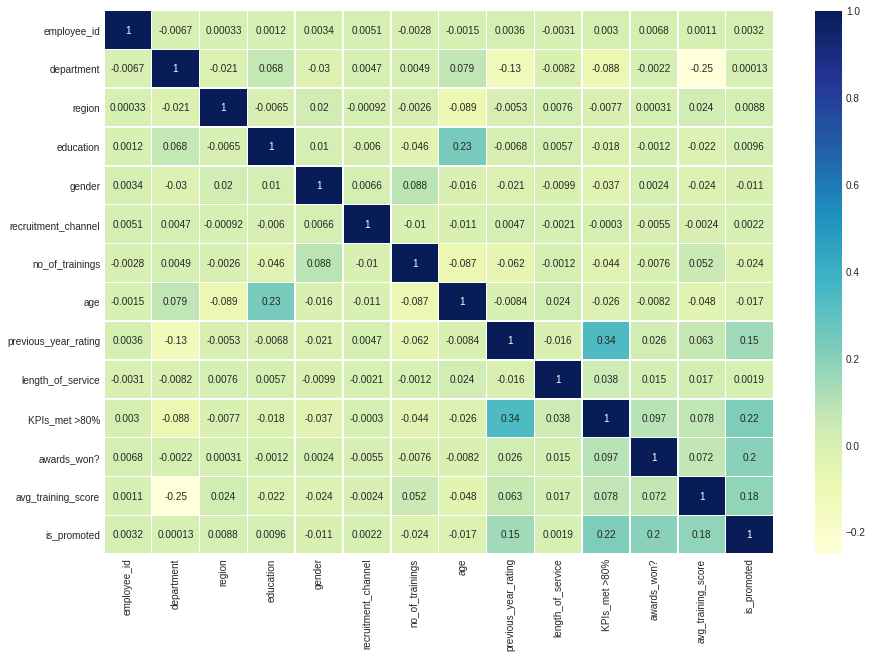

In [112]:
# Correlation Coefficient Matrix => Train Dataset

corr = train.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, cmap = 'YlGnBu', annot = True, linewidths = 0.5);

In [113]:
train.corr()['is_promoted'].sort_values()

no_of_trainings        -0.024345
age                    -0.017166
gender                 -0.011109
department              0.000130
length_of_service       0.001868
recruitment_channel     0.002229
employee_id             0.003183
region                  0.008841
education               0.009608
previous_year_rating    0.148368
avg_training_score      0.181147
awards_won?             0.195871
KPIs_met >80%           0.221582
is_promoted             1.000000
Name: is_promoted, dtype: float64

In [114]:
train.corr()['is_promoted'][:-1].sort_values()

no_of_trainings        -0.024345
age                    -0.017166
gender                 -0.011109
department              0.000130
length_of_service       0.001868
recruitment_channel     0.002229
employee_id             0.003183
region                  0.008841
education               0.009608
previous_year_rating    0.148368
avg_training_score      0.181147
awards_won?             0.195871
KPIs_met >80%           0.221582
Name: is_promoted, dtype: float64

**With respect to the correlation between the independent variables with target variable feature X_11 and X_15 have highly correlated.but mostly X_11 as seen from the PPS matrix as well as the below correlation plot.**

In [115]:
train.corr()['is_promoted'][:-1].sort_values().plot(kind='bar');

In [116]:
# Distribution plots of X_11 and X_15

plt.figure(figsize = (10,8))
sns.pairplot(train);

<Figure size 720x576 with 0 Axes>

In [117]:
train['is_promoted'].value_counts()
sns.countplot(x = 'is_promoted', palette = 'GnBu_d', data = train);

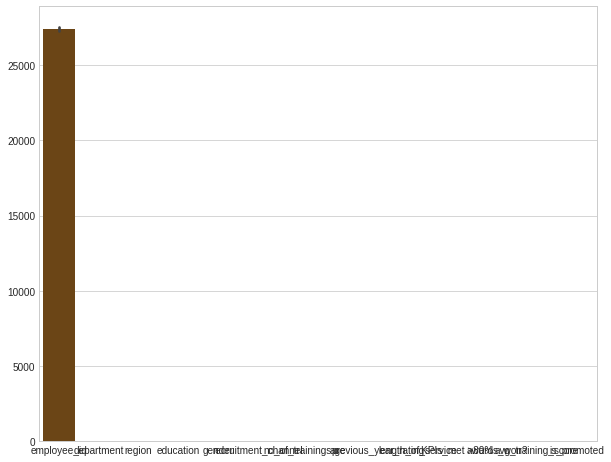

In [118]:
plt.figure(figsize = (10,8))
sns.barplot(palette = 'BrBG', data = train);

In [119]:
plt.figure(figsize = (20,15))
sns.boxplot(data = train);

### Droping the id column

In [120]:
# drop columns array
drop_col_array = [ 'employee_id' ]
print(drop_col_array)

['employee_id']


In [121]:
# drop INCIDENT_ID
train = train.drop(drop_col_array, axis=1)
print(train.shape)

(54808, 13)


# Feature engineeering & selection

In [122]:
# Splitting training dataset into train and test
X = train.copy().drop(['is_promoted'], axis=1).values
y = train['is_promoted']

In [123]:
print(train.shape)
print(X.shape)
print(y.shape)

(54808, 13)
(54808, 12)
(54808,)


## Model Building

In [124]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

**SMOTE**

In [125]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')

X_train, y_train = smote.fit_resample(X_train, y_train)


In [126]:
# Feature Scaling
sc = StandardScaler()
sc_fit = sc.fit(X_train)
X_train = sc_fit.transform(X_train)
X_test = sc_fit.transform(X_test)


### Adaboost Model

In [134]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics


ada = AdaBoostClassifier()
ada_fit = ada.fit(X_train, y_train)

**Predictions**

In [135]:
y_ada_pred_test = ada_fit.predict(X_test)
y_ada_pred_train = ada_fit.predict(X_train)

**Train and Test Recall Score**

In [136]:
print(metrics.recall_score(y_test, y_ada_pred_test))#test accuracy
print(metrics.recall_score(y_train, y_ada_pred_train))#train accuracy

0.5531453362255966
0.7635910224438903


In [137]:
# creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(y_test, y_ada_pred_test)
print(conf)

[[7922 2118]
 [ 412  510]]


In [138]:
# Actual Values of y_test
y_test.value_counts()

0    10040
1    922  
Name: is_promoted, dtype: int64

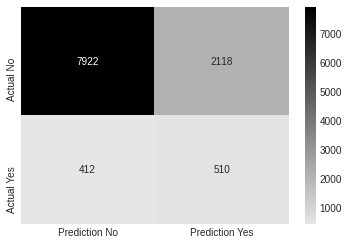

In [139]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [140]:
# Creating Classification Report

cr = metrics.classification_report(y_test, y_ada_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     10040
           1       0.19      0.55      0.29       922

    accuracy                           0.77     10962
   macro avg       0.57      0.67      0.57     10962
weighted avg       0.89      0.77      0.81     10962



### Catboost Model

In [85]:
!pip install catboost

     |████████████████████████████████| 66.3MB 56kB/s 


In [141]:
from catboost import CatBoostClassifier
from sklearn import metrics


cat = CatBoostClassifier()
cat_fit = cat.fit(X_train, y_train)

Learning rate set to 0.066991
0:	learn: 0.6599853	total: 35ms	remaining: 34.9s
1:	learn: 0.6313270	total: 68.9ms	remaining: 34.4s
2:	learn: 0.6090451	total: 103ms	remaining: 34.4s
3:	learn: 0.5908877	total: 135ms	remaining: 33.7s
4:	learn: 0.5742461	total: 169ms	remaining: 33.6s
5:	learn: 0.5535423	total: 209ms	remaining: 34.6s
6:	learn: 0.5434517	total: 244ms	remaining: 34.6s
7:	learn: 0.5325720	total: 276ms	remaining: 34.2s
8:	learn: 0.5183576	total: 311ms	remaining: 34.2s
9:	learn: 0.5088997	total: 346ms	remaining: 34.2s
10:	learn: 0.5019921	total: 379ms	remaining: 34.1s
11:	learn: 0.4896012	total: 420ms	remaining: 34.6s
12:	learn: 0.4845739	total: 455ms	remaining: 34.5s
13:	learn: 0.4790250	total: 488ms	remaining: 34.4s
14:	learn: 0.4698022	total: 522ms	remaining: 34.3s
15:	learn: 0.4623408	total: 555ms	remaining: 34.2s
16:	learn: 0.4532002	total: 588ms	remaining: 34s
17:	learn: 0.4452960	total: 636ms	remaining: 34.7s
18:	learn: 0.4384481	total: 669ms	remaining: 34.6s
19:	learn: 0.

**Predictions**

In [142]:
y_cat_pred_test = cat_fit.predict(X_test)
y_cat_pred_train = cat_fit.predict(X_train)

**Train and Test Recall Score**

In [143]:
print(metrics.recall_score(y_test, y_cat_pred_test))#test accuracy
print(metrics.recall_score(y_train, y_cat_pred_train))#train accuracy

0.5325379609544468
0.9210972568578554


In [144]:
# creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(y_test, y_cat_pred_test)
print(conf)

[[9071  969]
 [ 431  491]]


In [145]:
# Actual Values of y_test
y_test.value_counts()

0    10040
1    922  
Name: is_promoted, dtype: int64

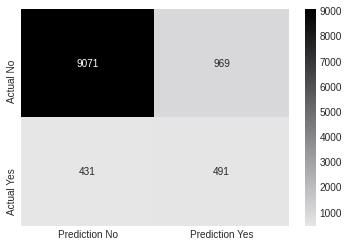

In [146]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [147]:
# Creating Classification Report

cr = metrics.classification_report(y_test, y_ada_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     10040
           1       0.19      0.55      0.29       922

    accuracy                           0.77     10962
   macro avg       0.57      0.67      0.57     10962
weighted avg       0.89      0.77      0.81     10962

